In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

/Users/huangj4/.jieprograms/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def plot_comparison_subplots(df0, df1, df2, numeric_columns, small_range_features, large_range_features, label0="Dataset 0", label1="Dataset 1", label2="Dataset 2", save_as=None):
    """
    Plots a comparison of mean values with error bars for three datasets,
    using two subplots: one for small-range features and one for large-range features.

    Parameters:
    df0 (pd.DataFrame): First dataset.
    df1 (pd.DataFrame): Second dataset.
    df2 (pd.DataFrame): Third dataset.
    numeric_columns (list): List of all numeric columns.
    small_range_features (list): Features with small values to be plotted separately.
    large_range_features (list): Features with larger values.
    label0 (str): Label for the first dataset.
    label1 (str): Label for the second dataset.
    label2 (str): Label for the third dataset.
    save_as (str, optional): File path to save the figure.

    Returns:
    None
    """
    # Compute mean and standard deviation for all datasets
    mean_values0 = df0[numeric_columns].mean()
    std_values0 = df0[numeric_columns].std()
    mean_values1 = df1[numeric_columns].mean()
    std_values1 = df1[numeric_columns].std()
    mean_values2 = df2[numeric_columns].mean()
    std_values2 = df2[numeric_columns].std()

    # Define bar width and positions
    x1 = np.arange(len(small_range_features))  # X positions for small range features
    x2 = np.arange(len(large_range_features))  # X positions for large range features
    bar_width = 0.3  # Adjusted width for three bars

    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot for small range features
    axes[0].bar(x1 - bar_width, mean_values0[small_range_features], yerr=std_values0[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label0, color='lightgray', edgecolor='black')
    axes[0].bar(x1, mean_values1[small_range_features], yerr=std_values1[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label1, color='skyblue', edgecolor='black')
    axes[0].bar(x1 + bar_width, mean_values2[small_range_features], yerr=std_values2[small_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label2, color='salmon', edgecolor='black')

    # Plot for large range features
    axes[1].bar(x2 - bar_width, mean_values0[large_range_features], yerr=std_values0[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label0, color='lightgray', edgecolor='black')
    axes[1].bar(x2, mean_values1[large_range_features], yerr=std_values1[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label1, color='skyblue', edgecolor='black')
    axes[1].bar(x2 + bar_width, mean_values2[large_range_features], yerr=std_values2[large_range_features], capsize=5,
                alpha=0.7, width=bar_width, label=label2, color='salmon', edgecolor='black')

    # Labels and titles for both subplots
    axes[0].set_ylabel("Wasserstein Distance")
    axes[0].set_xticks(ticks=x1)
    axes[0].set_xticklabels(small_range_features, rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    axes[0].legend()

    axes[1].set_ylabel("Wasserstein Distance")
    axes[1].set_xticks(ticks=x2)
    axes[1].set_xticklabels(large_range_features, rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].legend()

    # Adjust layout and show plot
    plt.tight_layout()
    if save_as is not None:
        plt.savefig(save_as)
    plt.show()

In [3]:
def show(model):
    #model='L10_L1'
    df_model = df[df["Structure"].str.contains("_{}_".format(model))] # From selected model
    plot_comparison_subplots(df_P, df_ref, df_model, numeric_columns, ['OO', 'OH', 'Order'], ['HOH', 'ZOH', 'Hbond'], label0="Training data", label1="Baseline", label2=model, save_as='{}/{}_comparision_to_{}.pdf'.format(baseOut, model, ground_truth))

In [101]:
jsonFolder = 'processed_data/distribution_distances'
ground_truth = 'Label'
baseOut = 'Outputs'
layer = 'Top'
with open('{}/similarities_{}_{}.json'.format(jsonFolder, ground_truth, layer), "r") as file:
    similarities = json.load(file)

In [102]:
numeric_columns = ["OO", "OH", "HOH", "ZOH", "Hbond", "Order"]
df = pd.DataFrame(columns = ['Structure', 'Truth', 'OO', 'OH', 'HOH', 'ZOH', 'Hbond', 'Order'])
for i, (key, value) in enumerate(similarities.items()):
    df.loc[i] = [key, ground_truth, value['OO_dist']['wdistancec'], value['OH_dist']['wdistancec'], value['HOH_dist']['wdistancec'], value['ThetaOH_dist']['wdistancec'], value['Hbonds']['wdistancec'], value['OrderP']['wdistancec']]

In [103]:
df

,Structure,Truth,OO,OH,HOH,ZOH,Hbond,Order
0,PPAFM2Exp_CoAll_L50_L1_Elatest,Label,0.138434,0.050927,9.982932,22.080230,3.994926,0.257907
1,PPAFM2Exp_CoAll_L60_L0.1_Elatest,Label,0.140209,0.053438,8.580682,16.611146,7.421867,0.285321
2,PPAFM2Exp_CoAll_L40_L10_Elatest,Label,0.130353,0.055385,12.126485,21.169463,3.351476,0.233872
3,PPAFM2Exp_CoAll_L30_L10_Elatest,Label,0.115097,0.050258,8.673381,25.297346,5.331090,0.262459
4,Ref,Label,0.141899,0.050919,8.941510,26.439339,5.255642,0.243280
...,...,...,...,...,...,...,...,...
70,PPAFM2Exp_CoAll_L70_L0.1_Elatest,Label,0.131843,0.052340,9.066509,17.446723,5.869477,0.261309
71,PPAFM2Exp_CoAll_L70_L0_Elatest,Label,0.132970,0.054875,11.221055,19.587034,3.499341,0.262286
72,PPAFM2Exp_CoAll_L20_L1_Elatest_C3,Label,0.095218,0.051270,10.365007,20.102492,2.148032,0.220138
73,PPAFM2Exp_CoAll_L20_L1_Elatest,Label,0.092539,0.050730,8.330127,15.154685,1.273239,0.231746


In [104]:
df_ref = df[df["Structure"].str.contains("Ref")]
df_P = df[df["Structure"] == 'P'] # The cropped version of Ref, including very large configurations

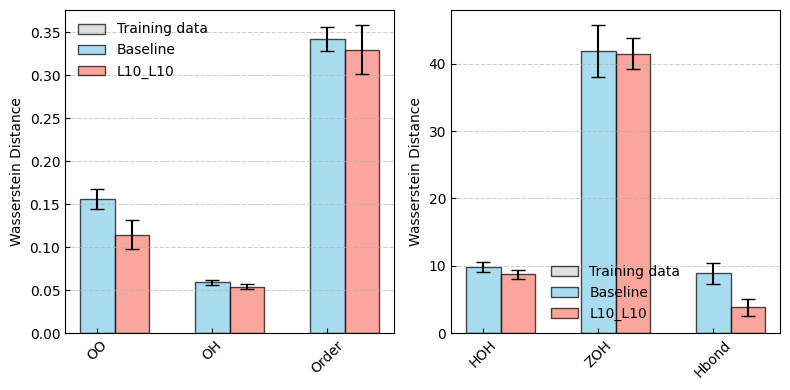

In [73]:
show('L10_L10')

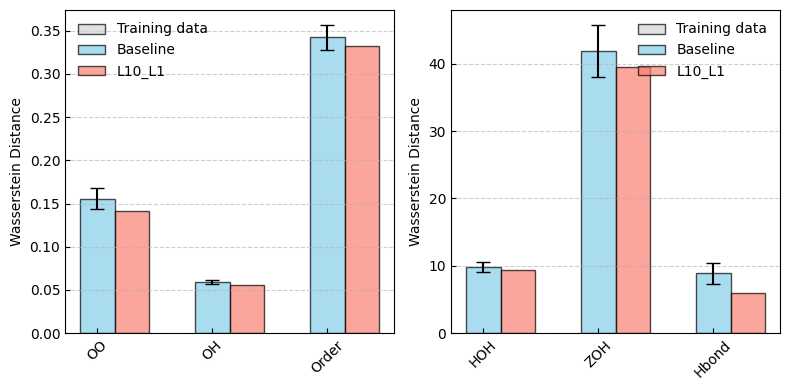

In [74]:
show('L10_L1')

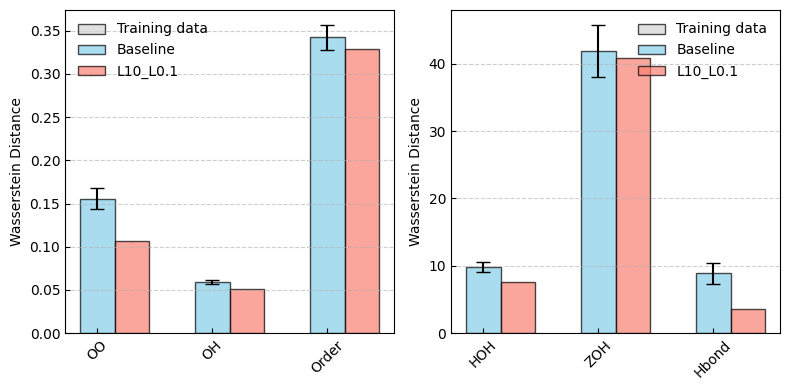

In [75]:
show('L10_L0.1')

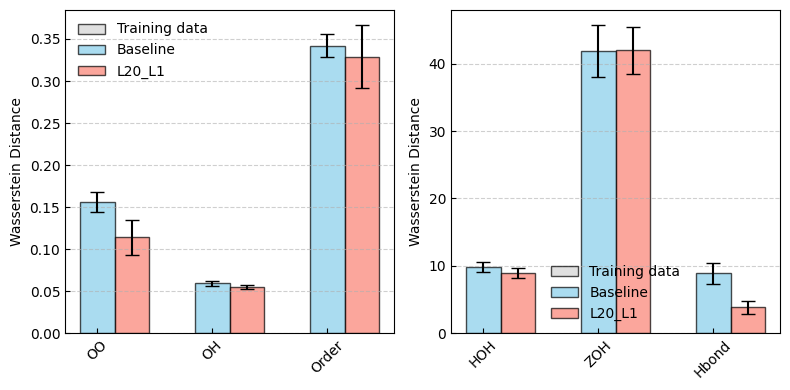

In [76]:
show('L20_L1')

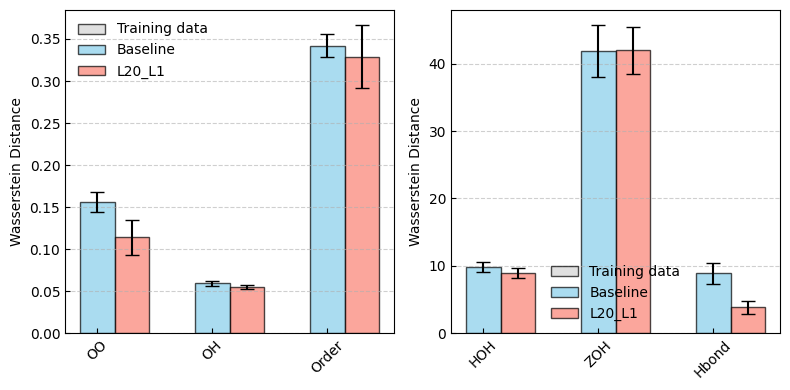

In [77]:
# *****
show('L20_L1')

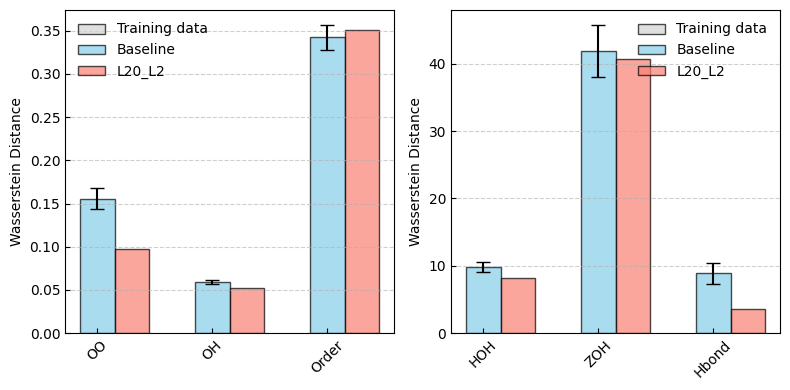

In [78]:
show('L20_L2')

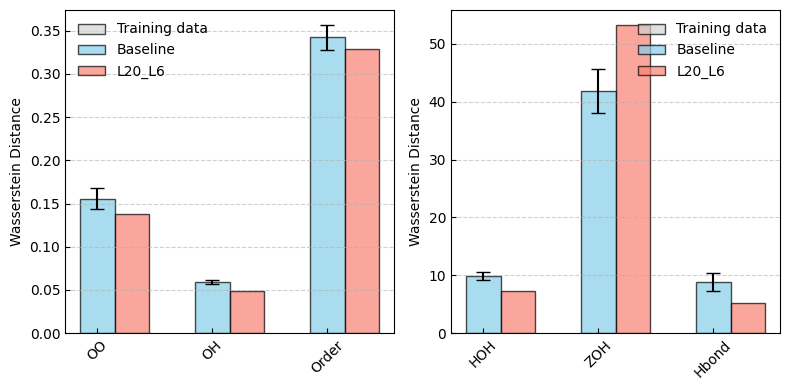

In [79]:
show('L20_L6')

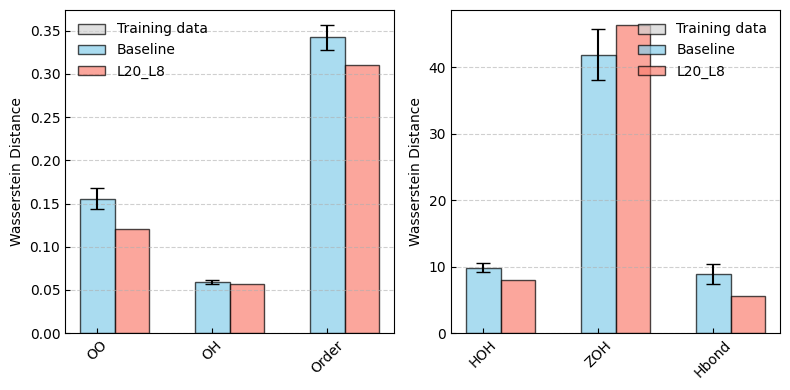

In [80]:
show('L20_L8')

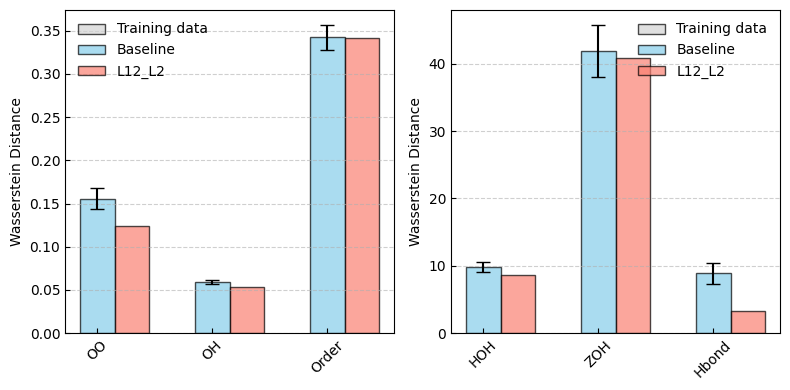

In [81]:
show('L12_L2')

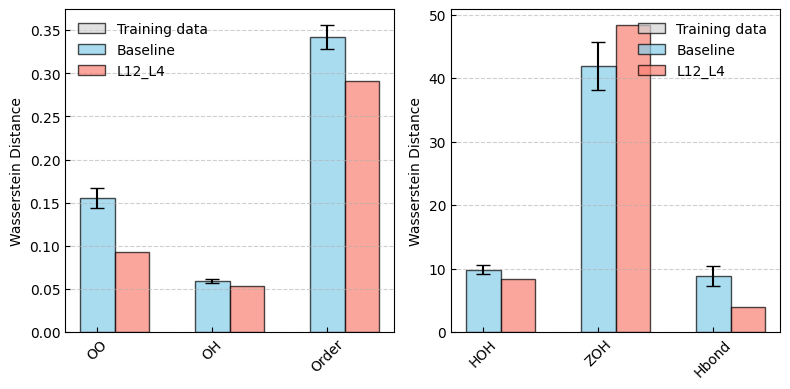

In [82]:
show('L12_L4')

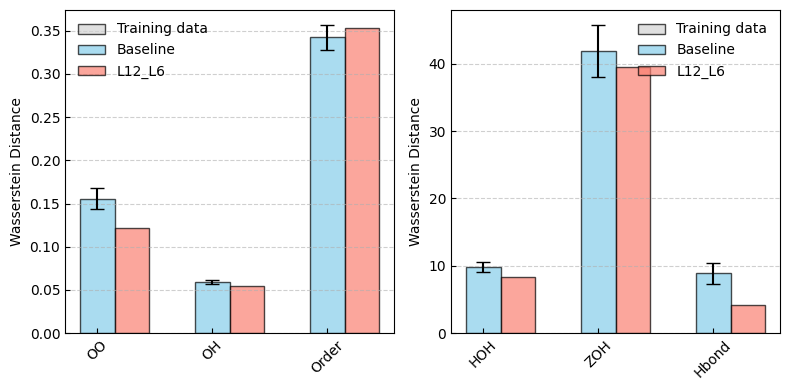

In [83]:
show('L12_L6')

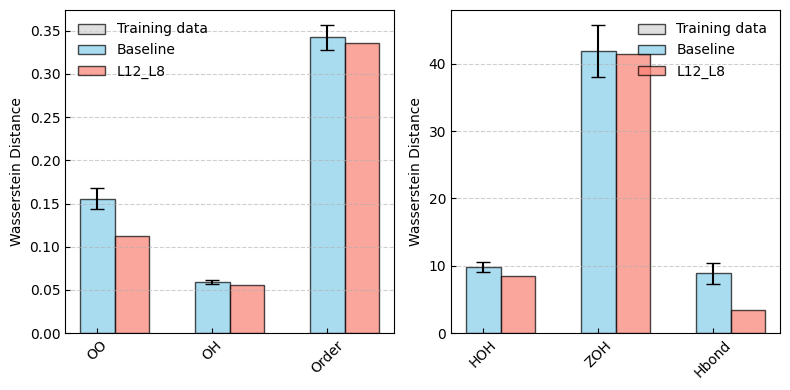

In [84]:
show('L12_L8')

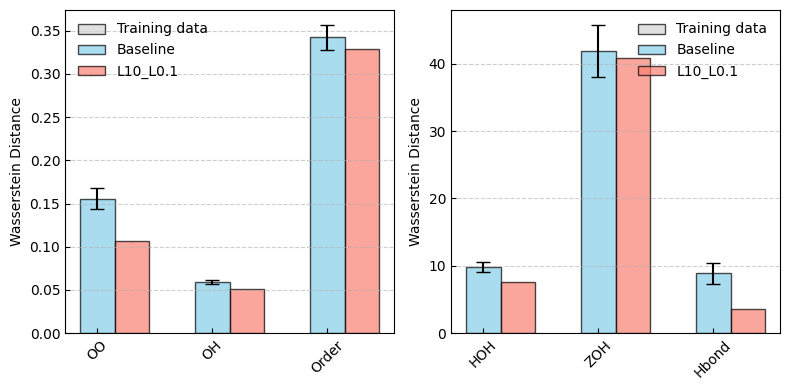

In [85]:
show('L10_L0.1')

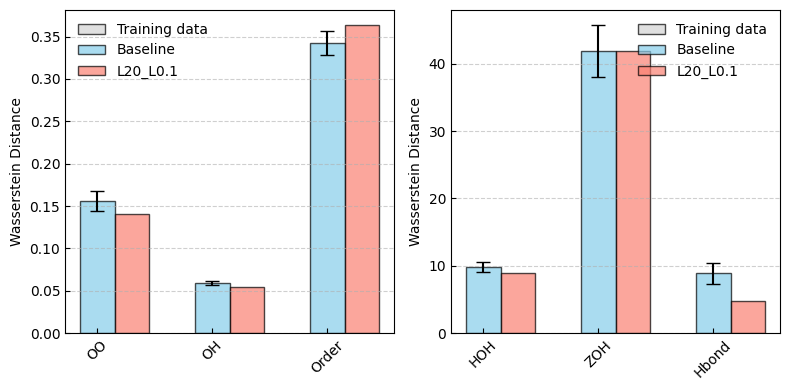

In [86]:
show('L20_L0.1')

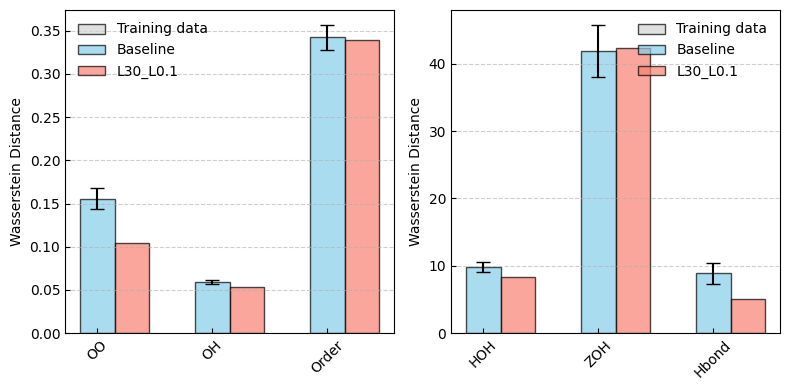

In [87]:
show('L30_L0.1')

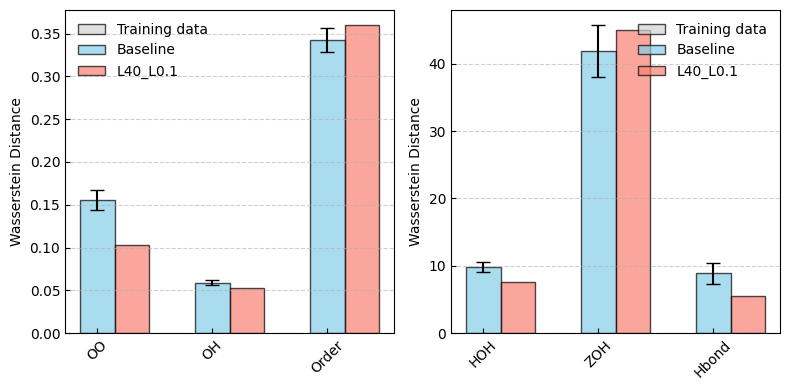

In [88]:
show('L40_L0.1')

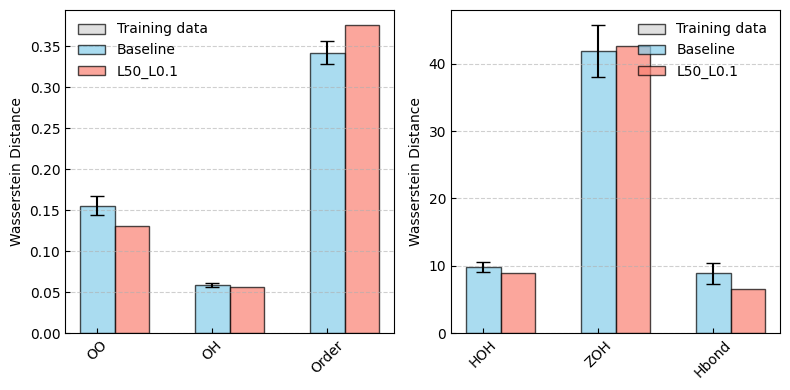

In [89]:
show('L50_L0.1')

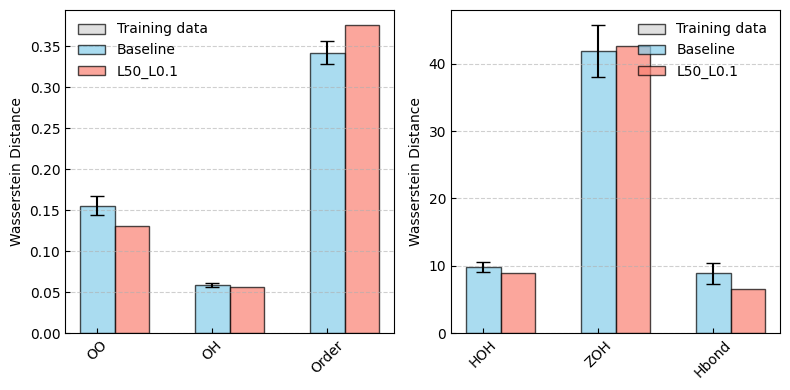

In [90]:
show('L50_L0.1')

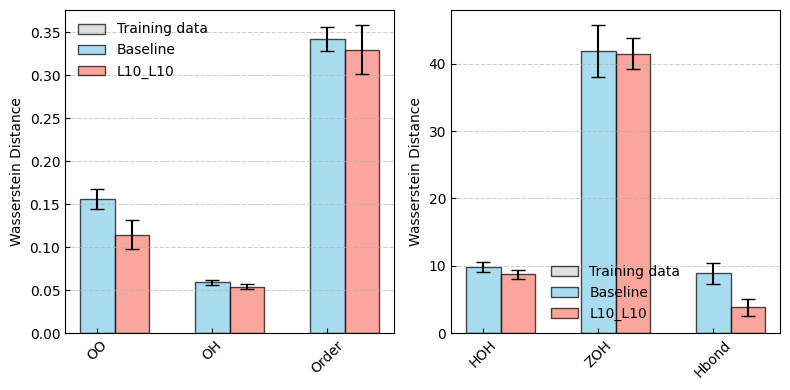

In [91]:
show('L10_L10')

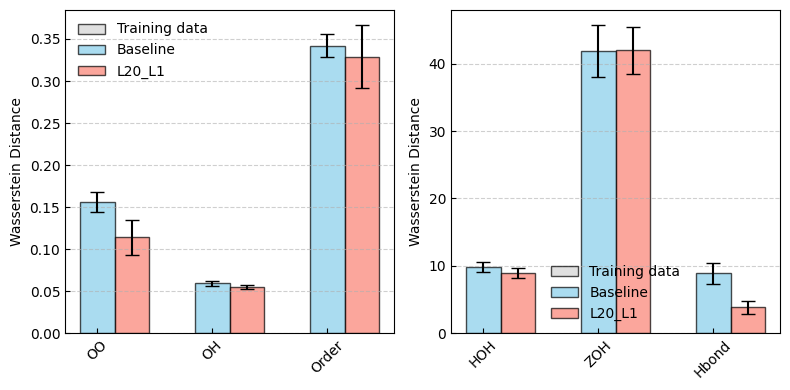

In [92]:
show('L20_L1')

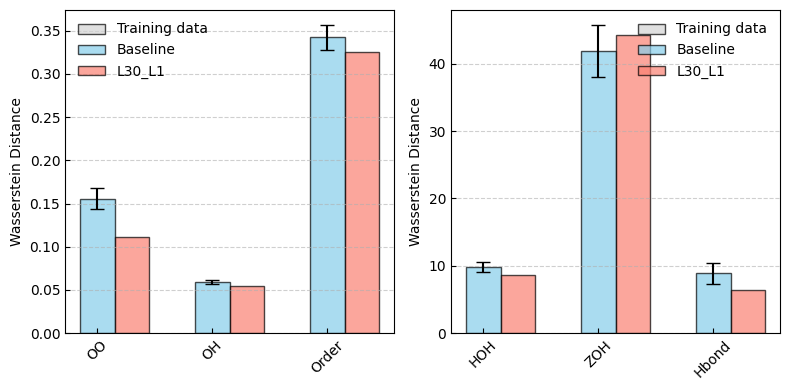

In [93]:
show('L30_L1')

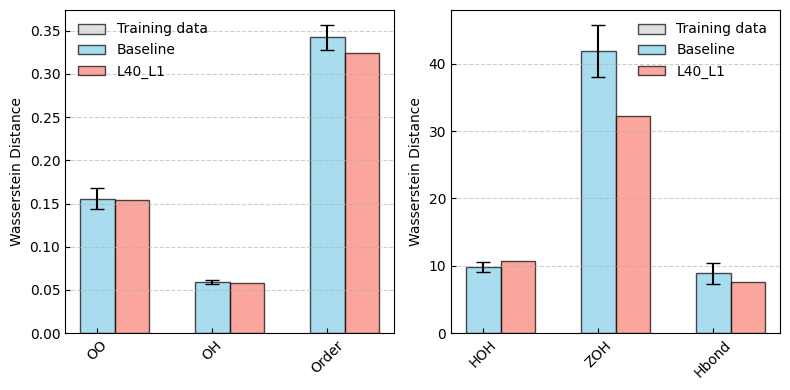

In [94]:
show('L40_L1')

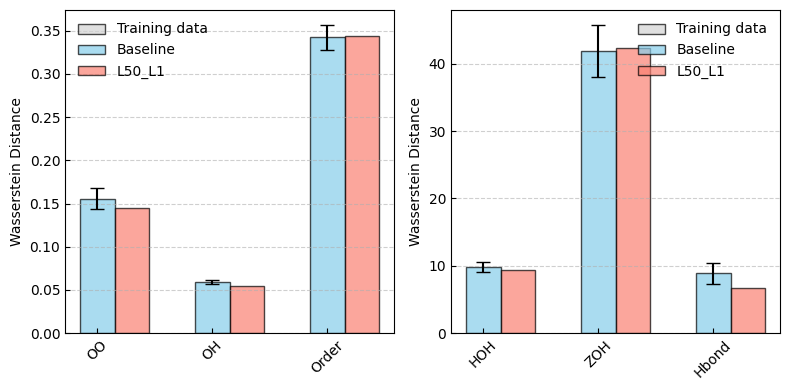

In [95]:
show('L50_L1')

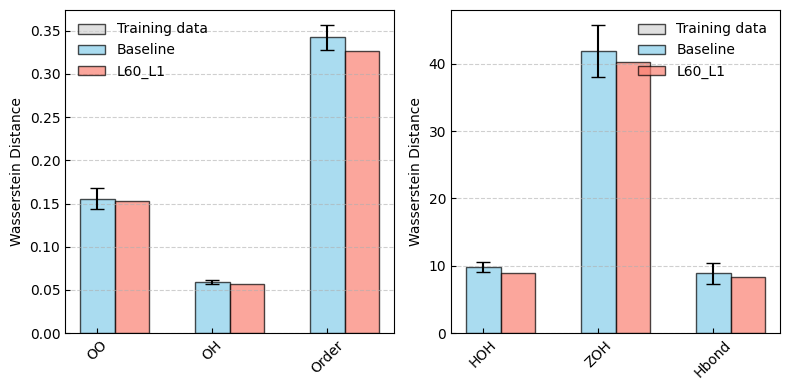

In [96]:
show('L60_L1')

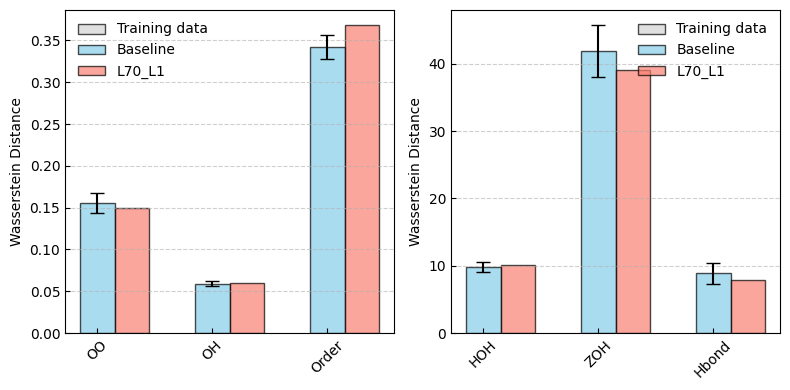

In [97]:
show('L70_L1')

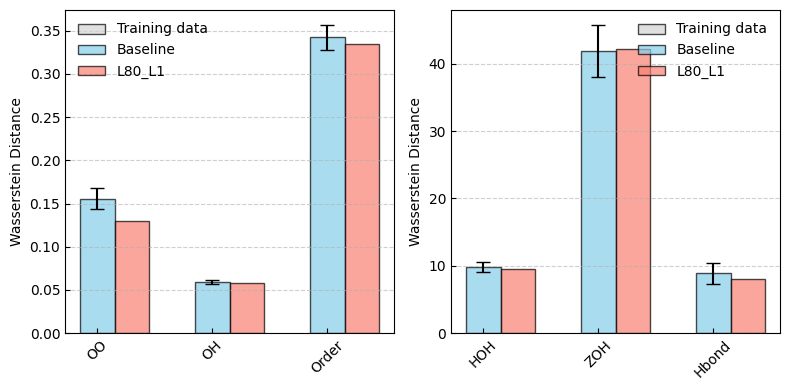

In [98]:
show('L80_L1')

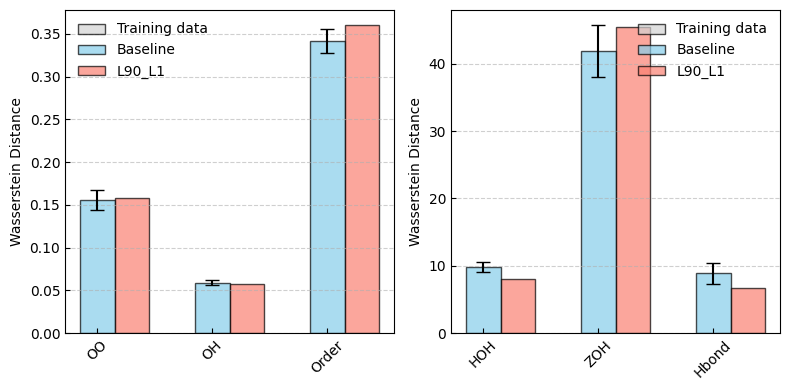

In [99]:
show('L90_L1')

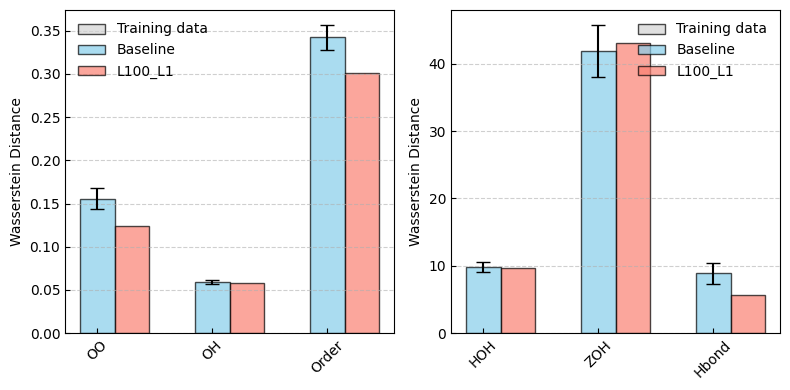

In [100]:
show('L100_L1')